In [14]:
%load_ext autoreload
%autoreload 2
import random
from subprocess import call

# tell jupyter notebook to show plots inline (with output)
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.stats.distributions import norm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# tell whiny modules to shut up about it 
warnings.simplefilter('ignore', np.RankWarning)
warnings.filterwarnings("ignore", module="matplotlib")
warnings.filterwarnings("ignore", module="statsmodels")

import netgen as ng

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1186]:
ng.setDirectory('directsweep')

In [1166]:
ng.getDirectory()

'directsweep0'

In [1165]:
ng.configureSweep(popscale=0.5, BaseStim = 2.3, WrongStim = [2.50], RightStim = [2.54], Dynamic=[30], indirect=[1], direct=[0.95,1,1.05])

3

In [1167]:
ng.compileAndRunSweep(2000,0,3)

KeyboardInterrupt: 

In [1187]:
results = ng.readAllTrialResults(699,0,3)

In [1169]:
results[0][0]['Dynamic']

30

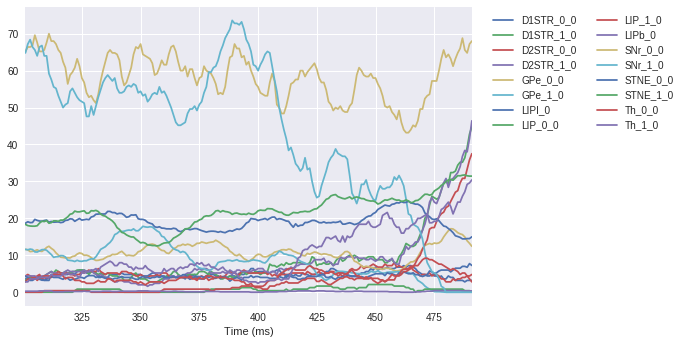

In [1176]:
results[0][0]['popfreqs'].plot(x='Time (ms)')
# _ = plt.legend(fontsize=13)
ax = plt.subplot(111)
ax.legend(loc='upper center', bbox_to_anchor=(1.25, 1),
          ncol=2, fancybox=True, shadow=True)

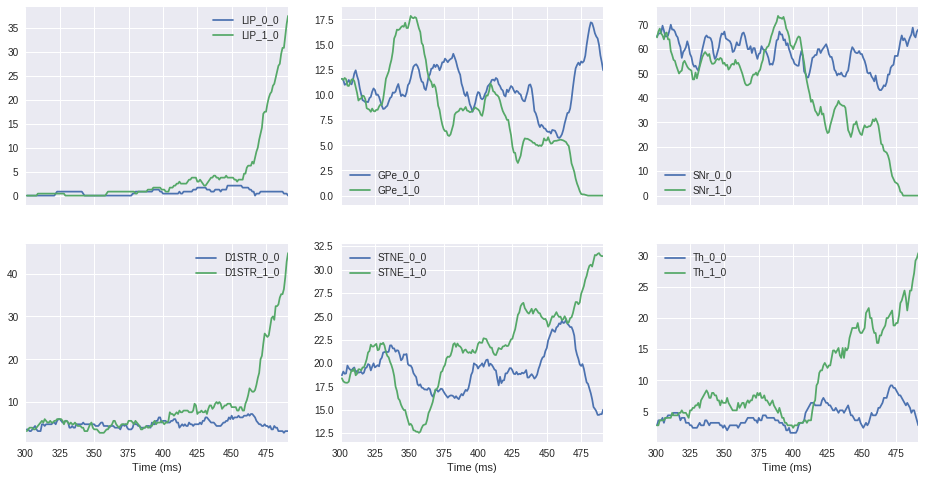

In [1179]:
f, (ax1, ax2) = plt.subplots(2, 3, figsize=(16,8), sharex=True)
result = results[0][0]
for i in range(0,result['dims']['choices']):
    result['popfreqs'].plot(x='Time (ms)', y='LIP_'+str(i)+'_0', ax=ax1[0])
    result['popfreqs'].plot(x='Time (ms)', y='GPe_'+str(i)+'_0', ax=ax1[1])
    result['popfreqs'].plot(x='Time (ms)', y='SNr_'+str(i)+'_0', ax=ax1[2])
    result['popfreqs'].plot(x='Time (ms)', y='D1STR_'+str(i)+'_0', ax=ax2[0])
    result['popfreqs'].plot(x='Time (ms)', y='STNE_'+str(i)+'_0', ax=ax2[1])
    result['popfreqs'].plot(x='Time (ms)', y='Th_'+str(i)+'_0', ax=ax2[2])

for ax, axx in zip(ax1, ax2):
    ax.set_xlim(300, ax.get_xlim()[-1])
    axx.set_xlim(300, ax.get_xlim()[-1])
        
# plt.savefig('/home/mclapp/firing_rates.png')

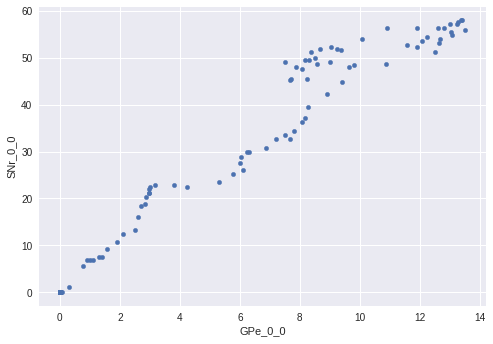

In [769]:
results[0][0]['popfreqs'].plot(x='GPe_0_0', y='SNr_0_0', kind='scatter')

In [1188]:
decisions = []
for sn in range(3):
    decisions.append([])
    for result in results[sn]:
        decisions[sn].append(ng.findOutputs(result)['decision made'])

In [1189]:
rightreact = []
wrongreact = []
accuracy = []
completed = []
for sn in range(3):
    rightreact.append([])
    wrongreact.append([])
    for decision in decisions[sn]:
        if decision['pathvals'] is None:
            continue 
        elif decision['pathvals'] == [0]:
            rightreact[sn].append(decision['delay'])
        else:
            wrongreact[sn].append(decision['delay'])
    completed.append((len(rightreact[sn])+len(wrongreact[sn]))/len(decisions[sn]))
    if len(rightreact[sn])+len(wrongreact[sn]) > 0:
        accuracy.append(len(rightreact[sn])/(len(rightreact[sn])+len(wrongreact[sn])))
    else:
        accuracy.append(-1)

In [1052]:
len(rightreact[1])

29

In [1184]:
for sn in range(3):
    print(sum(rightreact[sn]) / len(rightreact[sn]), sum(wrongreact[sn]) / len(wrongreact[sn]))

238.15365974 223.664338611
185.831060599 168.902102579
121.217237003 119.532893969


In [1185]:
for sn in range(3):
    print((sum(rightreact[sn])+sum(wrongreact[sn])) / (len(rightreact[sn]) + len(wrongreact[sn])))

235.110902303
180.851955299
120.60496863


In [1174]:
print(accuracy,completed)

[0.79, 0.7058823529411765, 0.6364942528735632] [0.4291845493562232, 0.899856938483548, 0.9957081545064378]


0.95 1
1 1
1.05 1


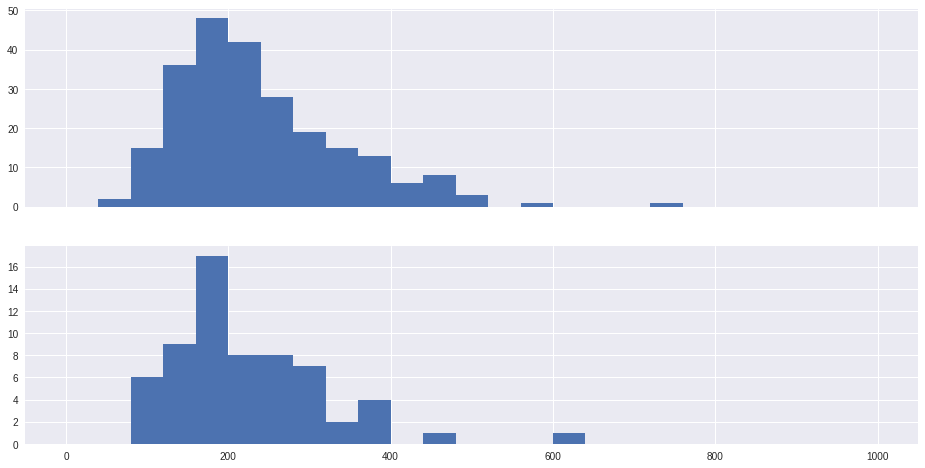

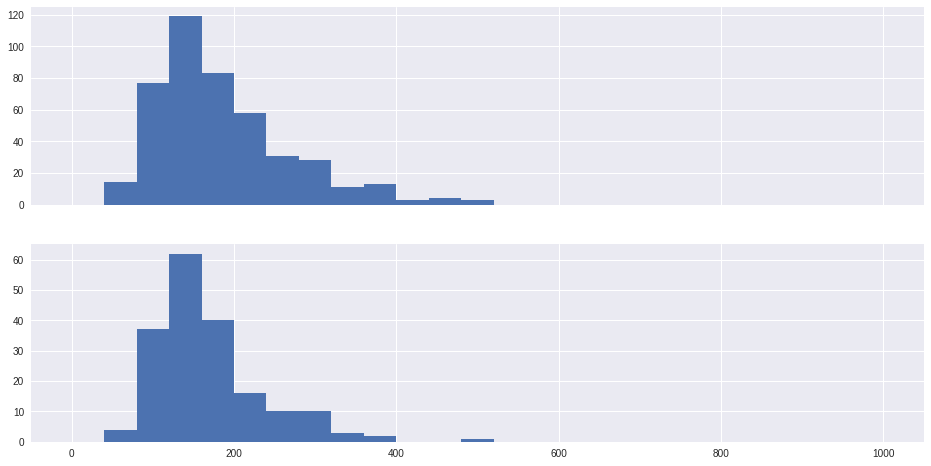

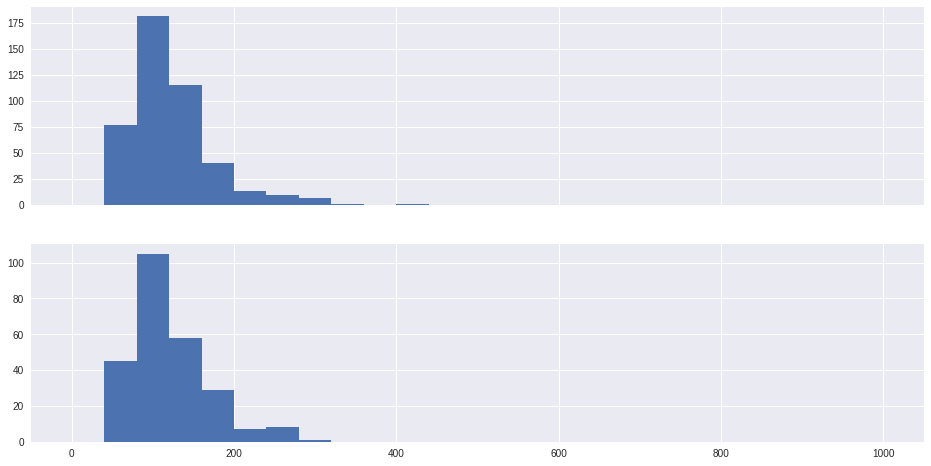

In [1193]:
for sn in range(3):
    print(results[sn][0]['direct'], results[sn][0]['indirect'])
    f, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,8), sharex=True)
    pd.Series(rightreact[sn]).hist(bins=25, range=[0,1000], ax=ax1)
    pd.Series(wrongreact[sn]).hist(bins=25, range=[0,1000], ax=ax2)
    plt.savefig('/home/mclapp/RTs_direct'+str(results[sn][0]['direct']*100)+'%_indirect'+str(results[sn][0]['indirect']*100)+'%.png')